# Deploying a Linear Regression Algorithm
## How to take the output of a linear regression algorithm and deploy it into a production environment

### Table of contents
1. The Problem
2. Loading the Data
3. Re-building the Model
4. Reviewing the Linear Regression Algorithm
5. Deploying the Linear Regression Algorithm
6. Conclusion

<img src="images/dlanor-s-2xEQDxB0ss4-unsplash.jpg">
<span>Photo by <a href="https://unsplash.com/@dlanor_s?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Dlanor S</a> on <a href="https://unsplash.com/s/photos/python-code?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

### The Problem
A little while ago a colleague from a company I was working with took a keen interest in one of my data science projects which was developing a linear regression to make probabilistic predictions about future cases of student retention (i.e. when students are likely to complete their courses or when they are likely to drop out before completing).

My colleague asked me how the result of all this data science work could be extracted out of the Python Machine Learning algorithm and deployed into the production environment (which is not written in Python) so that users of the core production systems could spot students who are likely to drop out and then give them additional support to help them succeed.

That got me thinking about how I could extract the machine learning algorithm from Python and encode it in a different programming language (for example Excel VB Macros, C#.NET etc.) which led to this article.

As the student data is private I have a public data set from Kaggle relating to the prediction of the sales prices of houses. The full Kaggle data set can be found <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data">here</a>

### Loading the Data
Let's start by importing the libraries we will need for the rest of the Notebook and by reading in the data which has been downloaded from Kaggle and placed in a sub directory called <b>data</b>.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import seaborn as sns

Note that the data has already been through the data science pipeline. It has been cleaned, explored, modelled, tested, validated and interpreted and these steps are outside the scope of this article.

We are assuming that the data and the model are sound and that we just want to transfer the machine learning algorithm into a production environment.

Here is what our final data set looks like -

In [2]:
housing = pd.read_csv("data/housing_prices_cleaned.csv")
housing.head()

,OverallQual,TotalBsmtSF,CentralAir,GrLivArea,GarageCars,SalePrice,G_Fin,G_RFn,G_Unf,PV_N,PV_P,PV_Y
0,7,856,1,1710,2,208500,0,1,0,0,0,1
1,6,1262,1,1262,2,181500,0,1,0,0,0,1
2,7,920,1,1786,2,223500,0,1,0,0,0,1
3,7,756,1,1717,3,140000,0,0,1,0,0,1
4,8,1145,1,2198,3,250000,0,1,0,0,0,1


To avoid making the data and hence the article over-complicated I have chosen to drop some of the features that the previous stages of the data science pipeline had concluded were only making a marginal contribution to the prediction algorithm -

In [3]:
housing = housing.drop(columns=['CentralAir'], axis=1)
housing = housing.drop(columns=['G_Fin', 'G_RFn','G_Unf'], axis=1)
housing = housing.drop(columns=['PV_N', 'PV_P','PV_Y'], axis=1)

The final data set we will be working with is as follows -

In [4]:
housing.head()

,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,SalePrice
0,7,856,1710,2,208500
1,6,1262,1262,2,181500
2,7,920,1786,2,223500
3,7,756,1717,3,140000
4,8,1145,2198,3,250000


Although the modelling stage is out of scope for this article, I did think it would be worth expending 1 line of code to have a look at the shape of the data. The following pairplot shows how each feature is distributed and confirms that the remaining features are correlated with the sale price which is our target / dependent variable.

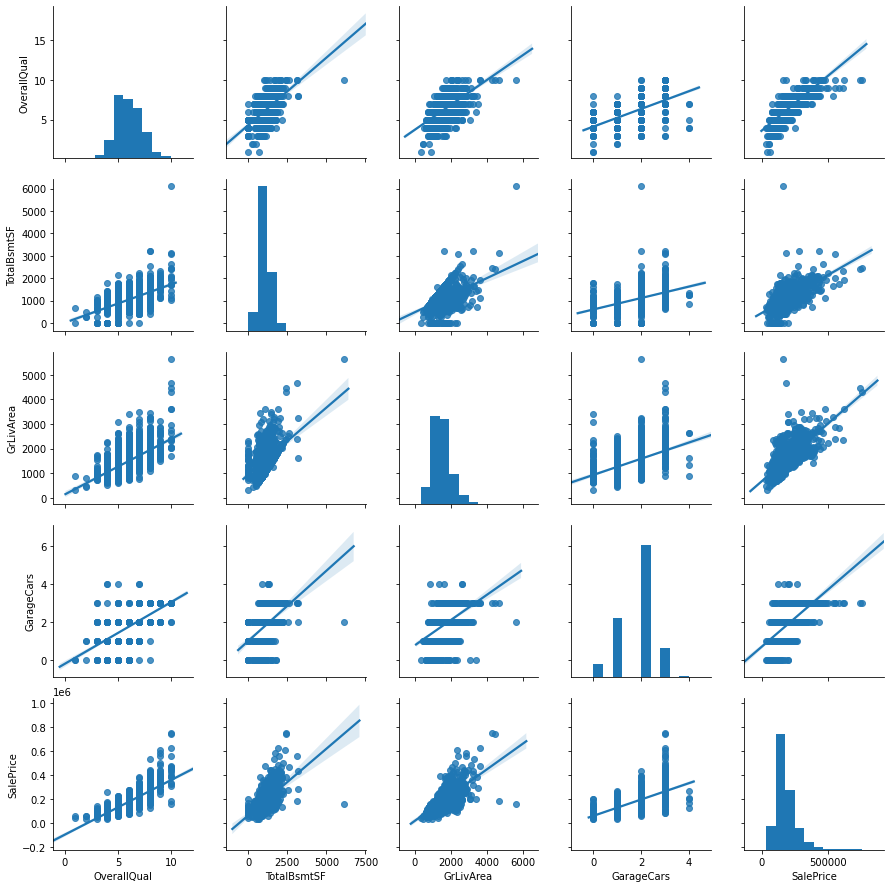

In [5]:
sns.pairplot(housing, kind='reg', diag_kind='hist')
plt.show()

### Re-building the Model
The machine learning model was build in a previous stage of the data science pipeline but it is going to be re-built here as we need the ```LinearRegression``` object to build our deployed algorithm.

<img src="images/charles-deluvio-pjAH2Ax4uWk-unsplash.jpg">
<span>Photo by <a href="https://unsplash.com/@charlesdeluvio?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Charles Deluvio</a> on <a href="https://unsplash.com/s/photos/data?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

Here we are splitting the data into two sets, 70% of which will be used to train the model and 30% to test the model.

In [5]:
# Seperate out the features into X and the target into y
X = housing.drop(['SalePrice'], axis = 'columns')
y = housing['SalePrice']

# Now split out data - 70% into the training dataset and 30% into the testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1111)

lr = LinearRegression() # Instantiate a LinearRegression object from the sklearn.linear_model library

# This odd looking code circumvents a bug in the LinearRegression class. 
# When the code is run by executing the entire Notebook the following error is raised -
# LinAlgError: SVD did not converge in Linear Least Squares
# The bug can be avoided by simply running the code twice!
try:
  lr.fit(X_train, y_train)
except:
  lr.fit(X_train, y_train)

Again, the accuracy of the model would have been established in the "Test and Validate Model" stage of the data science pipeline but let's just have a quick look to make sure the model is performing as expected ...

In [10]:
print(f"r squared = {lr.score(X_train, y_train)}")

def adjusted_r_squared(X_train, y_train):
    r2 = lr.score(X_train, y_train)
    adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)))
    return adj_r2

print(f"adjusted r squared = {adjusted_r_squared(X_train, y_train)}")

r squared = 0.746441600427625
adjusted r squared = 0.7454443205866323


Note: R-squared is a statistical measure of how close the actual data values of y are to the fitted regression line and in our case the model gets an R-squared of 74.6%.

However R-squared suffers from a disadvantage: the more features are added, the higher the value of R-squared. Hence the "Adjusted R-squared" is a better measure as it does take account of the number of features and just adding additional features can reduce the adjusted R-squared.

Our Adjusted R-squared is 74.5% and this is good enough for out purposes, so let's continue ...

The next line of code generates the predicted sales prices using the model and stores the results in ``y_pred``

In [11]:
y_pred = lr.predict(X_test)
y_pred

array([162748.54740409, 179918.69651808,  56278.07271446, 200019.80456027,
       124221.13505462, 188290.80972954, 187767.51786476, 236353.92910001,
       203383.82381732, 124736.14652884, 249779.91378916, 277293.94824422,
       107318.80062495, 125105.79534463, 216427.09465016, 282513.49728264,
       184712.54207451, 180387.38578604, 296110.21415008, 195159.54764033,
       203708.49009477, 197464.79266665, 200494.11000637, 157234.97422338,
       125105.79534463, 106698.35229358, 147720.85322836, 122027.4257043 ,
       123502.60707827, 151826.18411225, 193713.85031384, 120249.13443693,
       292782.86612543, 186016.30832139, 285509.07811277, 176643.64290179,
       195722.57876687, 216668.13536074, 198131.73286622, 174531.62685906,
       175065.31864383, 252118.73779293, 179297.62377182, 102299.3954905 ,
       120551.78186407, 311433.47676451, 104087.68743123, 133993.79632383,
        57881.82163325, 248260.97027603, 165880.27603999,  82290.08696341,
       192426.47040435, 2

Now let's take a copy of the testing data, add the actual price back in and also add in the predicted price that was generated by our linear regrssion machine learning algorithm ...

In [12]:
X_test_copy = X_test.copy()
X_test_copy['ActualPrice'] = y_test
X_test_copy['PredictedPrice'] = y_pred
X_test_copy.head()

,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,ActualPrice,PredictedPrice
1164,5,1360,1432,2,194000,162748.547404
860,7,912,1426,1,189950,179918.696518
520,4,0,1294,0,106250,56278.072714
219,7,1248,1248,2,167240,200019.804560
1025,5,882,882,2,112500,124221.135055


It all looks as expected. Now we can move onto the main objective which is to find a way to "productionize" the algorithm and to deploy it ...

### Reviewing the Linear Regression Algorithm
A linear regression uses the independent features to generate a straight line that best fits the independent variable (X axis) and dependent variable (y axis) -

<img src="images/LinearRegression.png">
<span>Image by author</span>

In a linear relationship between two variables like the one in the image the value of y can be predicted using a linear equation as follows -

$$r = mx + b$$

Here $m$ is the co-efficient of $x$ and $b$ is the intercept.

Our model has 4 features and it can be represented as a linear equation with 4 co-efficients as follows -

$$r = mw + nx+ oy + pz + b$$

... where w, x, y and z are our data values and m, n, o and p are the "co-efficents" we must multiply them by to predict the answer.

Once the model has been built the ``LinearEquation`` class can be used to retrieve the co-efficients and the intercept of our linear equation as follows -

In [11]:
print(f"coefficients: {lr.coef_}")
print(f"intercept: {lr.intercept_}")

coefficients: [24408.26533016    28.04885569    45.67283515 18806.45718838]
intercept: -100455.63728874002


If that is still a bit difficult to visualise the following Python function will create a simple ``DataFrame`` from the output of the model that we can use to easily see and use the output of the algorithm -

In [12]:
def coefficient_dataframe(lr, X_train):
    df_coef = pd.DataFrame(data=lr.coef_, index=X_train.columns) # Create the DataFrame
    df_coef.columns = ['Coefficient']                            # Rename the only column to be "Coefficient"

    df_coef.loc['intercept_'] = [lr.intercept_]                  # Add in the intercept

    df_coef['StdDev'] = 0                                        # Create a column to store the standard deviation

    for index, row in df_coef.iterrows():                        # Add the standard deviation of the training dataset for each column
        if index != 'intercept_':
            df_coef.loc[index, 'StdDev'] = X_train[index].std()
    
    df_coef.index.rename('Feature', inplace=True)                # Rename the index
    return df_coef                                               # Return the completed data set

df_coef = coefficient_dataframe(lr, X_train)
df_coef

,Coefficient,StdDev
Feature,,
OverallQual,24408.265330,1.380430
TotalBsmtSF,28.048856,451.799887
GrLivArea,45.672835,539.122692
GarageCars,18806.457188,0.751555
intercept_,-100455.637289,0.000000


Note that I have included the standard deviation because if you want to compare the co-efficients they must be multiplied by the standard deviation to be expressed in the same units as the following example illustrates -

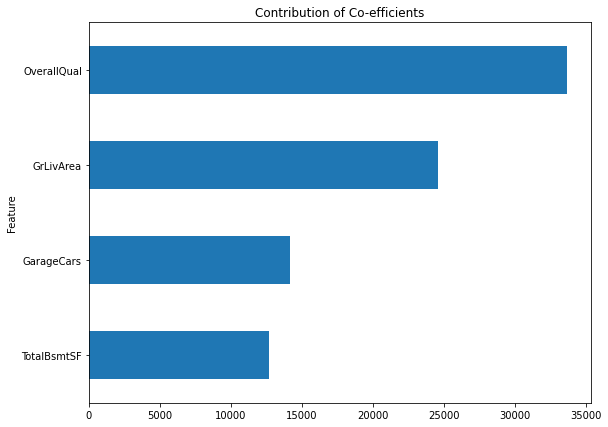

In [13]:
# This plot shows how much each contribution is contributing to the model output
df_plot = df_coef.copy()
df_plot.drop(['intercept_'], axis = 'rows', inplace=True)
df_plot['CoefTimesStddev'] = df_plot['Coefficient'] * df_plot['StdDev']

df_plot.sort_values(by='CoefTimesStddev',ascending=True)['CoefTimesStddev'].plot(kind='barh', figsize=(9, 7))

plt.title('Contribution of Co-efficients')
plt.show()

### Deploying the Linear Regression Algorithm
Now we have everything ready and we can deploy the linear regression represented by our model in a few easy steps.

First let's have another quick look at the test data including the actual price and the predicted price ...

In [18]:
X_test_copy.head()

,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,ActualPrice,PredictedPrice
1164,5,1360,1432,2,194000,162748.547404
860,7,912,1426,1,189950,179918.696518
520,4,0,1294,0,106250,56278.072714
219,7,1248,1248,2,167240,200019.804560
1025,5,882,882,2,112500,124221.135055


.. and our co-efficients and intercept -

In [14]:
df_coef

,Coefficient,StdDev
Feature,,
OverallQual,24408.265330,1.380430
TotalBsmtSF,28.048856,451.799887
GrLivArea,45.672835,539.122692
GarageCars,18806.457188,0.751555
intercept_,-100455.637289,0.000000


Now let's have a look at the values of the 4 features for the top row in our test data ...

In [19]:
X_test_copy.loc[1164]

OverallQual            5.000000
TotalBsmtSF         1360.000000
GrLivArea           1432.000000
GarageCars             2.000000
ActualPrice       194000.000000
PredictedPrice    162748.547404
Name: 1164, dtype: float64

To "productionize" our linear regression algorithm all we have to do is multiply the value of each feature in our chosen rown of data with its associated co-efficent as follows -

In [20]:
calc_price = -100455.637289 + (24408.265330 * 5) + (28.048856 * 1360) + (45.672835 * 1432) + (18806.457188 * 2)
calc_price

162748.54761699997

This shows that the sales price for the row with index ``1164`` was predicted to be ``162748.547404`` by the linear regression machine learning model and the amount predicted by our simple linear equation which used the co-efficents and the intercept was ``162748.54761699997``. 

Our simple linear algorithm matched the model output to 3 decimal places which I have assumed is a rounding issue and it is certainly close enough to implement in our production environment.

### Conclusion
Now that we know the co-efficients for each of the features and the intercept we can write a very simple function that could easily be ported to Excel VBA, C#.NET or any other programming language.

This function is deceptively simple because it is the culmination of the entire data science pipeline of activities consolidated into one simple function.

Please note that if this were a real-world example I would periodically re-run the data science pipeline on current data to ensure that my chosen features, their co-efficents and the intercept are still a good representation of the real world and that they are producing predictions that are sufficiently accurate to use.

Here is the final function, written in Python, but easily ported into any other language -

In [15]:
def implemented_house_price_algorithm(OverallQual, TotalBsmtSF, GrLivArea, GarageCars):
    house_price = -100455.637289                                   # Intercept
    house_price = house_price + (24408.265330 * OverallQual)       # Co-efficient for OverallQual
    house_price = house_price + (28.048856 * TotalBsmtSF)          # Co-efficient for TotalBsmtSF
    house_price = house_price + (45.672835 * GrLivArea)            # Co-efficient for GrLivArea
    house_price = house_price + (18806.457188 * GarageCars)        # Co-efficient for GarageCars
    return house_price

In [16]:
price = implemented_house_price_algorithm(5, 1360, 1432, 2)
print(f"${price:.2f}")

$162748.55


In [17]:
price = implemented_house_price_algorithm(7, 912, 1426, 1)
print(f"${price:.2f}")

$179918.70
